In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [2]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_application_record = pd.read_csv('../input/credit-card-approval-prediction/application_record.csv')
raw_credit_record = pd.read_csv('../input/credit-card-approval-prediction/credit_record.csv')

In [4]:
raw_application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


# Data Preprocessing

In [5]:
raw_application_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [6]:
raw_app = raw_application_record[['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']]

In [7]:
raw_app['DAYS_BIRTH'] = abs(raw_app['DAYS_BIRTH'])/365
raw_app['DAYS_BIRTH'] = raw_app['DAYS_BIRTH'].round(0).astype('int') 

In [8]:
raw_app['DAYS_EMPLOYED'] = abs(raw_app['DAYS_EMPLOYED'])/365
raw_app['DAYS_EMPLOYED'] = raw_app['DAYS_EMPLOYED'].round(0).astype('int')

In [9]:
raw_app = raw_app.rename(columns= {'DAYS_BIRTH':'AGE_IN_YEARS','DAYS_EMPLOYED':'YEARS_EMPLOYED'})

In [10]:
raw_app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE_IN_YEARS,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,43.833960,177.897587,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,11.472765,374.887799,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,34.000000,3.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,43.000000,7.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,53.000000,16.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,69.000000,1001.000000,1.0,1.000000,1.000000,1.000000,20.000000


## Removing Outliers

In [11]:
q1 = raw_app['CNT_CHILDREN'].quantile(0.99)
q2 = raw_app['YEARS_EMPLOYED'].quantile(0.99)
q3 = raw_app['CNT_FAM_MEMBERS'].quantile(0.99)
q4 = raw_app['AMT_INCOME_TOTAL'].quantile(0.99)

df1 = raw_app[raw_app['CNT_CHILDREN']<q1]
df2 = df1[df1['YEARS_EMPLOYED']<q2]
df3 = df2[df2['CNT_FAM_MEMBERS']<q3]
raw_app = df3[df3['AMT_INCOME_TOTAL']<q4]

In [12]:
raw_app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE_IN_YEARS,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,3.524030e+05,352403.000000,352403.000000,352403.000000,352403.000000,352403.0,352403.000000,352403.000000,352403.000000,352403.000000
mean,6.022906e+06,0.463651,187323.453035,40.597657,7.195711,1.0,0.249717,0.286252,0.117008,2.244232
std,5.705041e+05,0.685479,82819.546754,9.650350,6.607195,0.0,0.432850,0.452009,0.321430,0.857166
min,5.008804e+06,0.000000,27000.000000,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.617496e+06,0.000000,135000.000000,33.000000,2.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.048010e+06,0.000000,175500.000000,40.000000,5.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.448816e+06,1.000000,225000.000000,48.000000,10.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,2.000000,531000.000000,68.000000,48.000000,1.0,1.000000,1.000000,1.000000,4.000000


In [13]:
preprocessed_data = pd.merge(raw_app, raw_credit_record, on='ID')
preprocessed_data = preprocessed_data.drop('ID',axis=1)

In [14]:
preprocessed_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_IN_YEARS,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,NaN,2.0,0,C
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,NaN,2.0,-1,C
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,NaN,2.0,-2,C
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,NaN,2.0,-3,C
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629560,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,1,0,0,0,Laborers,1.0,-9,0
629561,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,1,0,0,0,Laborers,1.0,-10,2
629562,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,1,0,0,0,Laborers,1.0,-11,1
629563,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,1,0,0,0,Laborers,1.0,-12,0


In [15]:
preprocessed_data.isna().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
AGE_IN_YEARS                0
YEARS_EMPLOYED              0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        106642
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [16]:
ProfileReport(preprocessed_data, title="Preprocessed Data) ")

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### As we can se the column OCCUPATION_TYPE has 30% missing Data. So it is better to drop such column.
##### We can also see column FLAG_MOBIL has only one unique value. So we can remove it too.

In [17]:
preprocessed_data = preprocessed_data.drop(['OCCUPATION_TYPE', 'FLAG_MOBIL'], axis=1)

##### According to a doc bad customer are those who have more than 90days of debt. So we can label c,x,0,1,2 as 1 and rest as 0

In [18]:
Labels = []
for i in preprocessed_data["STATUS"]:
    if i in {'x','c','0','1','2'}:
        Labels.append(1)
    else:
        Labels.append(0)

In [19]:
len(preprocessed_data)

629565

In [20]:
preprocessed_data["STATUS"] = Labels

In [21]:
preprocessed_data = preprocessed_data.rename(columns={'STATUS':'LABELS'})

## Balancing the Data

In [22]:
n = len(preprocessed_data[preprocessed_data['LABELS']==1])

In [23]:
preprocessed_data = preprocessed_data.sort_values(by='LABELS', axis=0, ascending=False)
preprocessed_data = preprocessed_data[:2*n]

In [24]:
len(preprocessed_data[preprocessed_data['LABELS']==0])

242874

# Data Visualization

In [25]:
preprocessed_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_IN_YEARS,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,LABELS
629564,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,0,0,0,1.0,-13,1
518961,F,N,Y,0,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,36,2,0,0,0,1.0,-45,1
323758,F,N,Y,0,112500.0,Working,Higher education,Single / not married,House / apartment,40,9,0,0,0,1.0,-59,1
323757,F,N,Y,0,112500.0,Working,Higher education,Single / not married,House / apartment,40,9,0,0,0,1.0,-50,1
519052,F,N,Y,0,135000.0,State servant,Secondary / secondary special,Single / not married,House / apartment,28,8,1,1,0,1.0,-8,1


<AxesSubplot:xlabel='LABELS', ylabel='Count'>

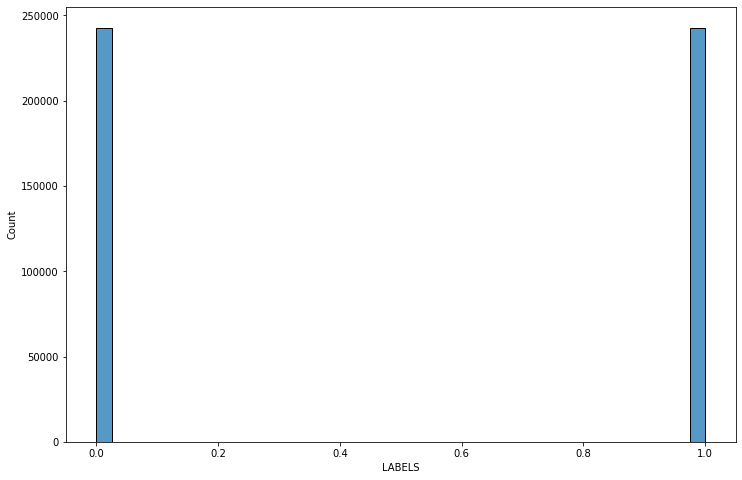

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(preprocessed_data['LABELS'])

<AxesSubplot:xlabel='CODE_GENDER', ylabel='Count'>

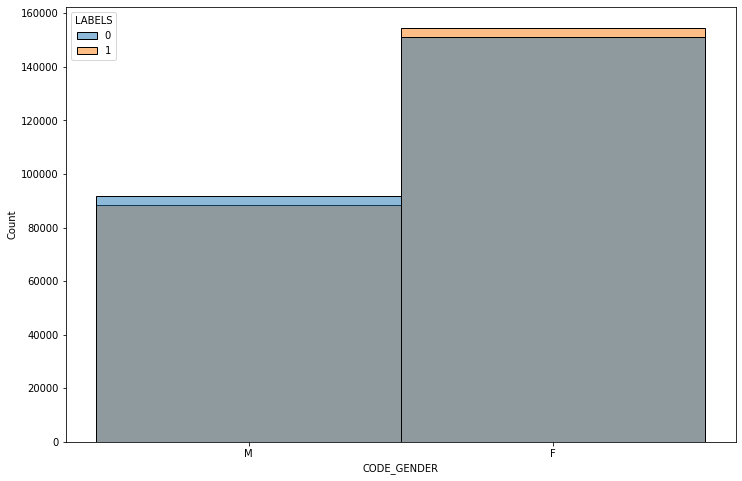

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['CODE_GENDER'],hue = preprocessed_data['LABELS'])

In [28]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['CODE_GENDER'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['CODE_GENDER']==i])
    y = len(preprocessed_data[(preprocessed_data['CODE_GENDER']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

M ->	 49.02239443969489
F ->	 50.57621705811906


<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='Count'>

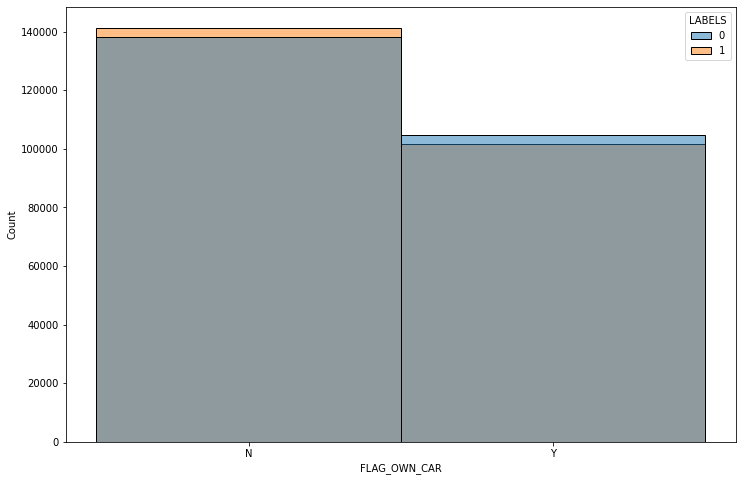

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['FLAG_OWN_CAR'],hue = preprocessed_data['LABELS'])

In [30]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['FLAG_OWN_CAR'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['FLAG_OWN_CAR']==i])
    y = len(preprocessed_data[(preprocessed_data['FLAG_OWN_CAR']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

N ->	 50.557958647732924
Y ->	 49.24386778959209


<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='Count'>

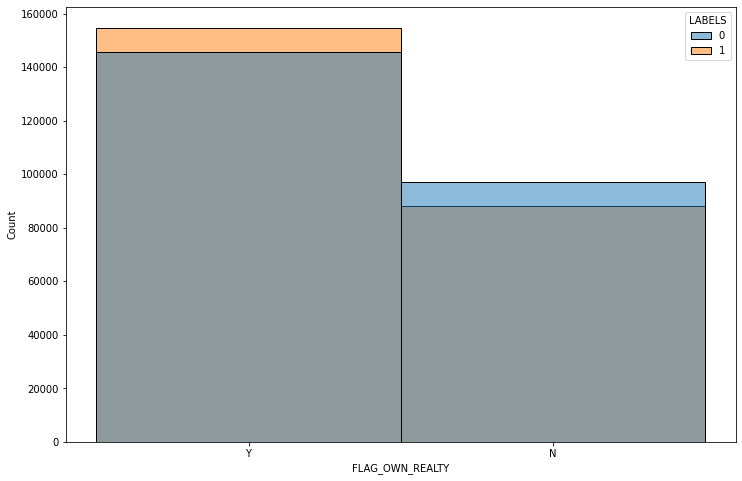

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['FLAG_OWN_REALTY'],hue = preprocessed_data['LABELS'])

In [32]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['FLAG_OWN_REALTY'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['FLAG_OWN_REALTY']==i])
    y = len(preprocessed_data[(preprocessed_data['FLAG_OWN_REALTY']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

Y ->	 51.50369307685394
N ->	 47.56233778147107


<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Count'>

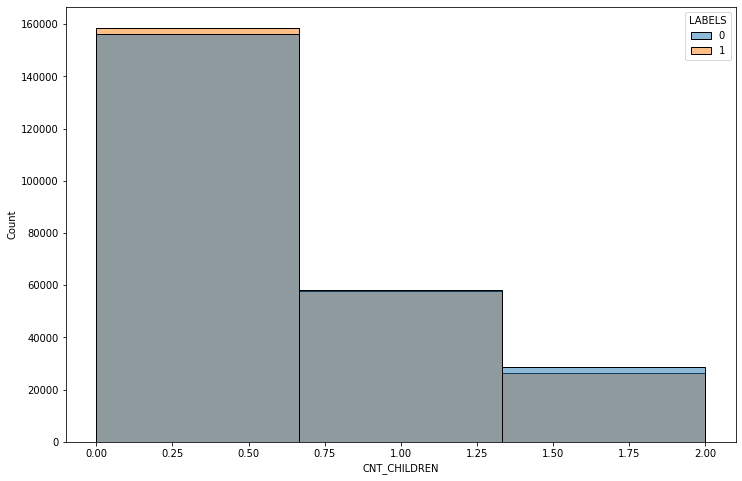

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['CNT_CHILDREN'], bins=3, hue = preprocessed_data['LABELS'])

In [34]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['CNT_CHILDREN'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['CNT_CHILDREN']==i])
    y = len(preprocessed_data[(preprocessed_data['CNT_CHILDREN']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

0 ->	 50.40284149394467
1 ->	 49.816619059536244
2 ->	 48.08456582887215


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

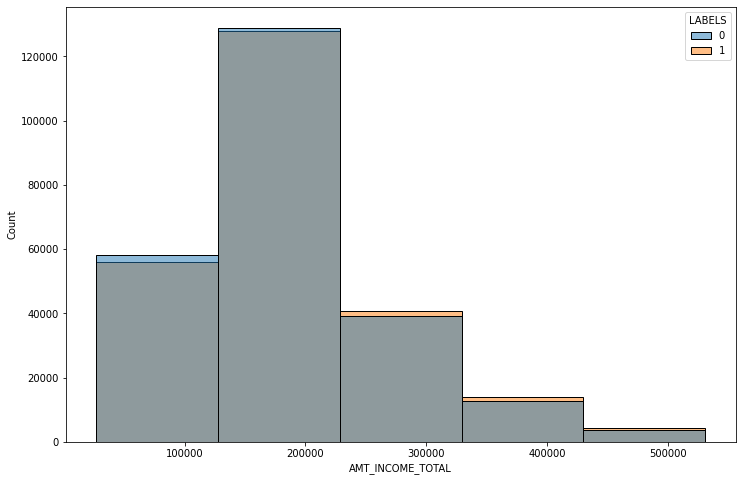

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['AMT_INCOME_TOTAL'],bins=5, hue = preprocessed_data['LABELS'])

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='Count'>

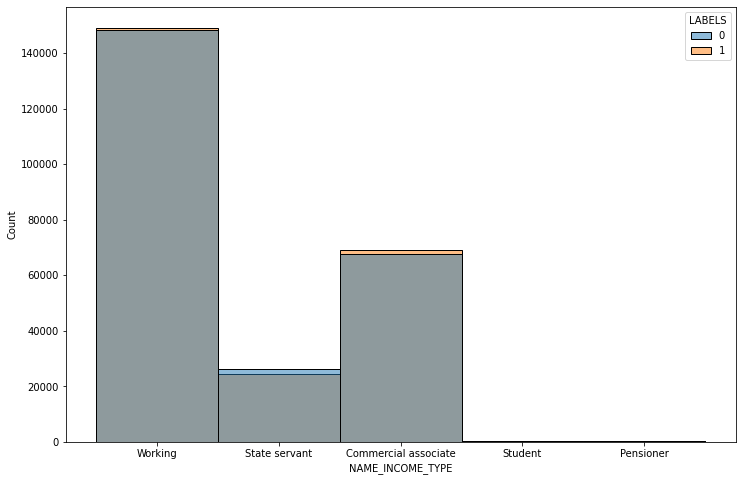

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['NAME_INCOME_TYPE'], hue = preprocessed_data['LABELS'])

In [37]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['NAME_INCOME_TYPE'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['NAME_INCOME_TYPE']==i])
    y = len(preprocessed_data[(preprocessed_data['NAME_INCOME_TYPE']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

Working ->	 50.13581110154905
State servant ->	 48.1216457960644
Commercial associate ->	 50.50632170451885
Student ->	 20.178041543026705
Pensioner ->	 39.949748743718594


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='Count'>

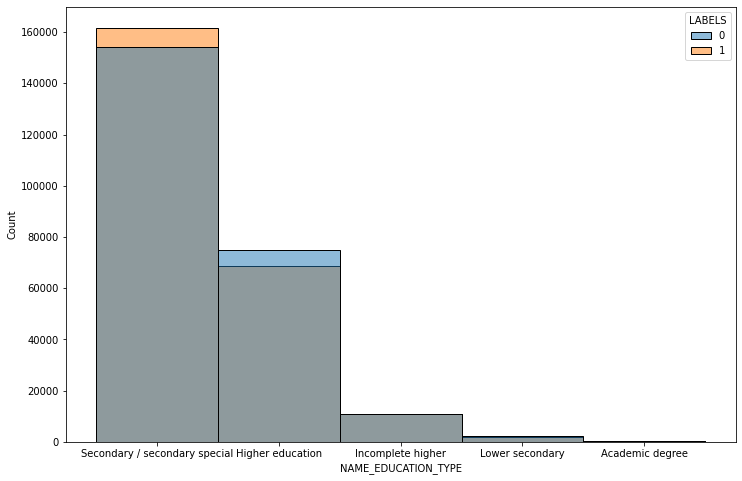

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['NAME_EDUCATION_TYPE'], hue = preprocessed_data['LABELS'])

In [39]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['NAME_EDUCATION_TYPE'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['NAME_EDUCATION_TYPE']==i])
    y = len(preprocessed_data[(preprocessed_data['NAME_EDUCATION_TYPE']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

Secondary / secondary special ->	 51.18433755915357
Higher education ->	 47.77445381198441
Incomplete higher ->	 49.5253018711402
Lower secondary ->	 42.2293150012276
Academic degree ->	 30.197268588770864


<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='Count'>

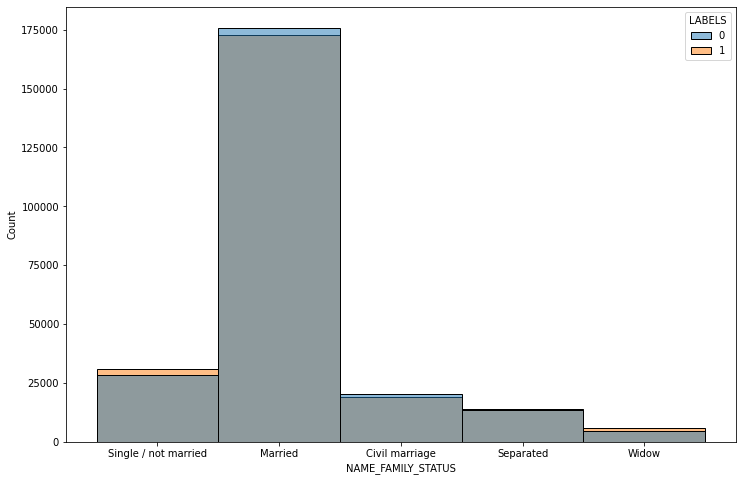

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['NAME_FAMILY_STATUS'], hue = preprocessed_data['LABELS'])

In [41]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['NAME_FAMILY_STATUS'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['NAME_FAMILY_STATUS']==i])
    y = len(preprocessed_data[(preprocessed_data['NAME_FAMILY_STATUS']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

Single / not married ->	 52.13165190344175
Married ->	 49.57408119131068
Civil marriage ->	 48.644067796610166
Separated ->	 50.39392844235634
Widow ->	 56.06484069312465


<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='Count'>

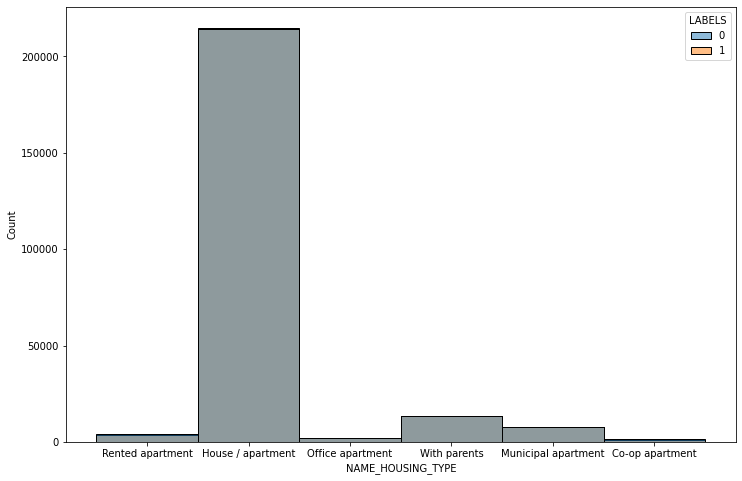

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['NAME_HOUSING_TYPE'], hue = preprocessed_data['LABELS'])

In [43]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['NAME_HOUSING_TYPE'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['NAME_HOUSING_TYPE']==i])
    y = len(preprocessed_data[(preprocessed_data['NAME_HOUSING_TYPE']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

Rented apartment ->	 49.60957834461218
House / apartment ->	 50.09637818473379
Office apartment ->	 46.22959315884944
With parents ->	 50.44244483440988
Municipal apartment ->	 49.40341825217672
Co-op apartment ->	 40.826963168867266


<AxesSubplot:xlabel='AGE_IN_YEARS', ylabel='Count'>

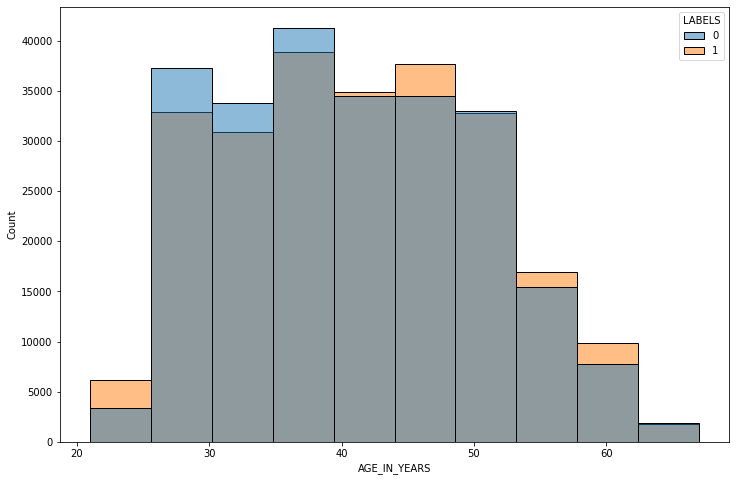

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['AGE_IN_YEARS'], bins=10, hue = preprocessed_data['LABELS'])

<AxesSubplot:xlabel='YEARS_EMPLOYED', ylabel='Count'>

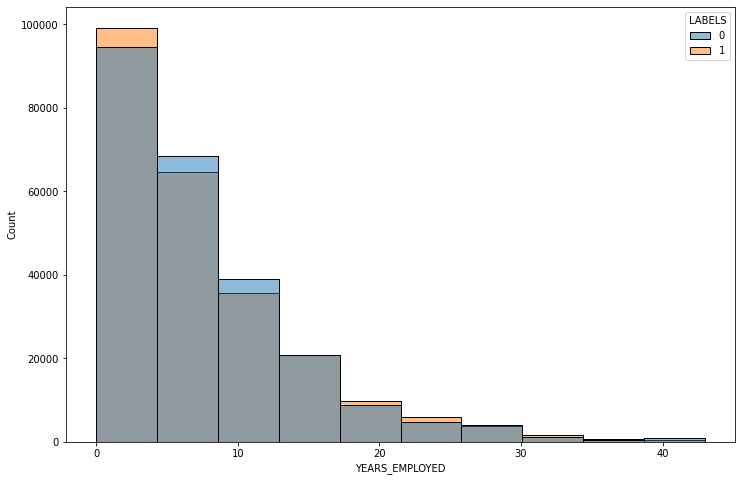

In [45]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['YEARS_EMPLOYED'], bins=10, hue = preprocessed_data['LABELS'])

<AxesSubplot:xlabel='FLAG_WORK_PHONE', ylabel='Count'>

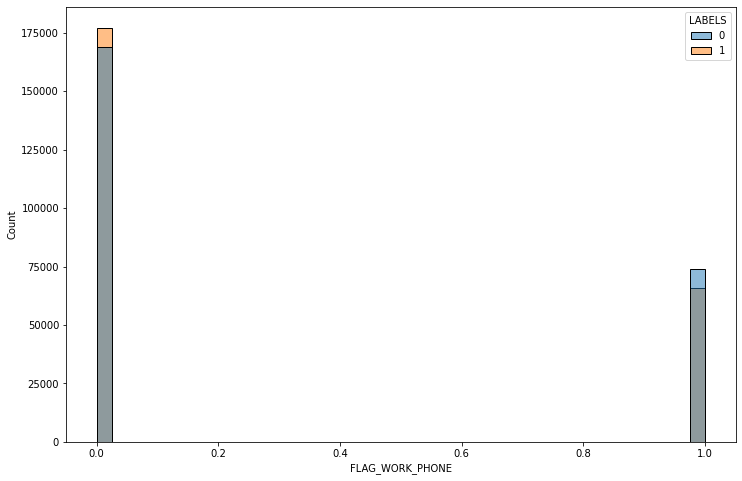

In [46]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['FLAG_WORK_PHONE'], hue = preprocessed_data['LABELS'])

In [47]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['FLAG_WORK_PHONE'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['FLAG_WORK_PHONE']==i])
    y = len(preprocessed_data[(preprocessed_data['FLAG_WORK_PHONE']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

0 ->	 51.17945724449428
1 ->	 47.07836133401098


<AxesSubplot:xlabel='FLAG_PHONE', ylabel='Count'>

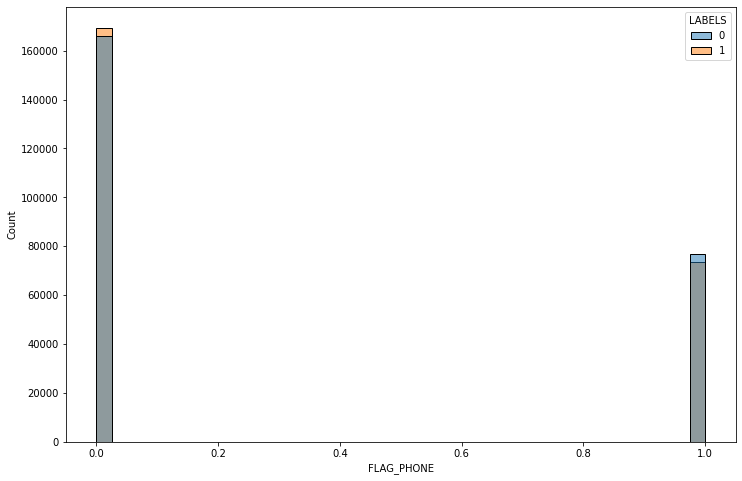

In [48]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['FLAG_PHONE'], hue = preprocessed_data['LABELS'])

In [49]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['FLAG_PHONE'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['FLAG_PHONE']==i])
    y = len(preprocessed_data[(preprocessed_data['FLAG_PHONE']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

0 ->	 50.490501471057286
1 ->	 48.90500748627516


<AxesSubplot:xlabel='FLAG_EMAIL', ylabel='Count'>

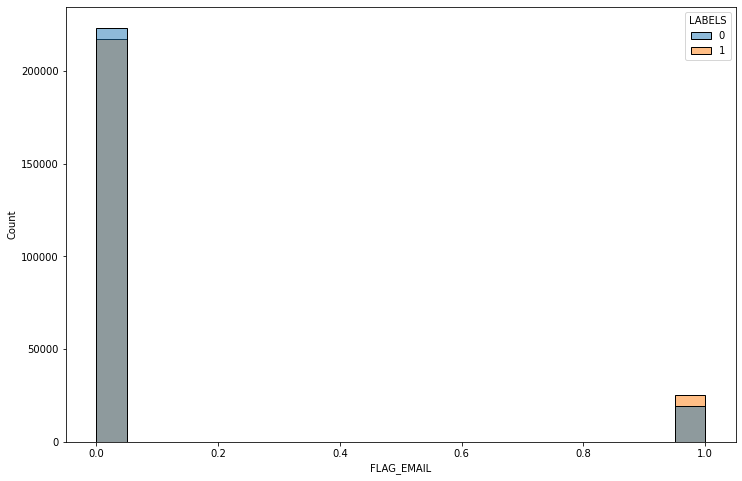

In [50]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['FLAG_EMAIL'], hue = preprocessed_data['LABELS'])

In [51]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['FLAG_EMAIL'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['FLAG_EMAIL']==i])
    y = len(preprocessed_data[(preprocessed_data['FLAG_EMAIL']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

0 ->	 49.339284012579014
1 ->	 56.469098502688055


<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Count'>

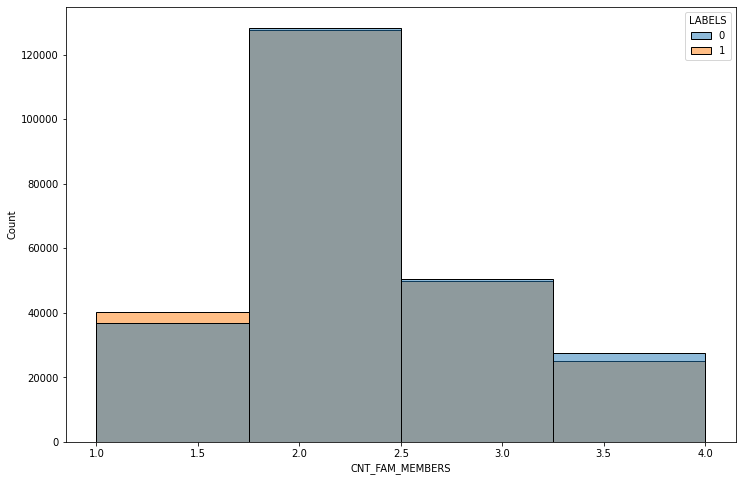

In [52]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['CNT_FAM_MEMBERS'],bins=4, hue = preprocessed_data['LABELS'])

In [53]:
print("______percentage of 1 per category______",'\n')
list1 = preprocessed_data['CNT_FAM_MEMBERS'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['CNT_FAM_MEMBERS']==i])
    y = len(preprocessed_data[(preprocessed_data['CNT_FAM_MEMBERS']==i) & (preprocessed_data['LABELS']==1)])
    print(i,"->\t",y*100/x)

______percentage of 1 per category______ 

1.0 ->	 52.340624512911106
2.0 ->	 49.838333209525636
3.0 ->	 49.72745119532831
4.0 ->	 47.88175842547209


<AxesSubplot:xlabel='MONTHS_BALANCE', ylabel='Count'>

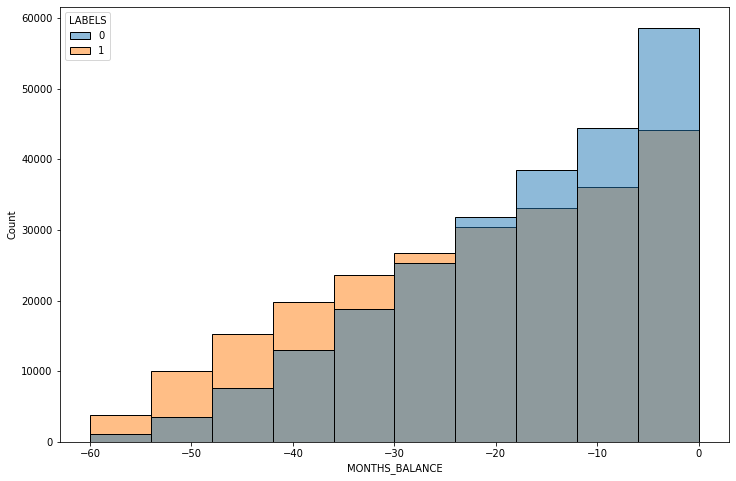

In [54]:
plt.figure(figsize=(12,8))
sns.histplot(x=preprocessed_data['MONTHS_BALANCE'],bins=10, hue = preprocessed_data['LABELS'])

# Data Processing

## Splitting Dependent and Independent Data 

In [55]:
preprocessed_data.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE_IN_YEARS',
       'YEARS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'LABELS'],
      dtype='object')

In [56]:
X_data = preprocessed_data[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE_IN_YEARS',
       'YEARS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE']]
Y_data = preprocessed_data[['LABELS']]

In [57]:
X_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_IN_YEARS,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
629564,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,0,0,0,1.0,-13
518961,F,N,Y,0,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,36,2,0,0,0,1.0,-45
323758,F,N,Y,0,112500.0,Working,Higher education,Single / not married,House / apartment,40,9,0,0,0,1.0,-59
323757,F,N,Y,0,112500.0,Working,Higher education,Single / not married,House / apartment,40,9,0,0,0,1.0,-50
519052,F,N,Y,0,135000.0,State servant,Secondary / secondary special,Single / not married,House / apartment,28,8,1,1,0,1.0,-8


## Converting Character Value to Integer data

In [58]:
X_data['CODE_GENDER'] = X_data['CODE_GENDER'].map({'M':0, 'F':1})
X_data['FLAG_OWN_CAR'] = X_data['FLAG_OWN_CAR'].map({'N':0, 'Y':1})
X_data['FLAG_OWN_REALTY'] = X_data['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [59]:
X_data['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Student',
       'Pensioner'], dtype=object)

## Creating Dummy variables

In [60]:
df = pd.get_dummies(X_data,drop_first=True)
X_data = pd.concat([X_data , df], axis=1)

In [61]:
X_data.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE_IN_YEARS',
       'YEARS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE_IN_YEARS',
       'YEARS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NA

In [62]:
X_data = X_data.drop(columns=['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'],axis=0)

In [63]:
X_data = X_data.reset_index()

In [64]:
X_data = X_data.drop(columns=['index'],axis=0)

## Scaling Data

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
X_data[['AMT_INCOME_TOTAL','AGE_IN_YEARS','YEARS_EMPLOYED','CNT_FAM_MEMBERS', 'MONTHS_BALANCE']] = scaler.fit_transform(X_data[['AMT_INCOME_TOTAL','AGE_IN_YEARS','YEARS_EMPLOYED','CNT_FAM_MEMBERS', 'MONTHS_BALANCE']])

In [68]:
X_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE_IN_YEARS,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,0,1,0,-0.916869,-1.689843,-0.684860,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,1,0,-0.109308,-0.527520,-0.834992,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,-0.916869,-0.104856,0.215934,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,1,0,-0.916869,-0.104856,0.215934,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,1,0,-0.647682,-1.372846,0.065801,1,1,0,...,1,0,0,1,0,1,0,0,0,0


In [69]:
from sklearn.feature_selection import f_classif

In [70]:
data = f_classif(X_data, Y_data)
columns = X_data.columns

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [71]:
df = pd.DataFrame(columns=[['Columns','F Statistics','P Value']])
df['Columns'] = X_data.columns
df['F Statistics'] = data[0].round(4)
df['P Value'] = data[1].round(4)
df

,Columns,F Statistics,P Value
0,CODE_GENDER,109.4755,0.0000
1,FLAG_OWN_CAR,81.9865,0.0000
2,FLAG_OWN_REALTY,713.2457,0.0000
3,CNT_CHILDREN,93.4737,0.0000
4,AMT_INCOME_TOTAL,121.3025,0.0000
5,AGE_IN_YEARS,366.7561,0.0000
6,YEARS_EMPLOYED,12.1720,0.0005
7,FLAG_WORK_PHONE,670.4663,0.0000
8,FLAG_PHONE,104.3792,0.0000
9,FLAG_EMAIL,831.8997,0.0000


##### We can see P value of 'NAME_FAMILY_STATUS_Separated', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents' is more than 0.05 so we can remove it.

In [72]:
X_data = X_data.drop(columns=['NAME_FAMILY_STATUS_Separated','NAME_EDUCATION_TYPE_Incomplete higher','NAME_HOUSING_TYPE_Municipal apartment','NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents'], axis=0)

## Splitting Test Train Data

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=360)

# Model

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
classfi = RandomForestClassifier(max_depth=48, n_jobs=-1, n_estimators=200)

In [77]:
classfi.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=48, n_estimators=200, n_jobs=-1)

In [78]:
classfi.score(x_train, y_train)

0.8674163317496735

In [79]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
pred_test = classfi.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [80]:
confusion_matrix(y_test, pred_test)

array([[19423,  4844],
       [ 6013, 18295]])

In [81]:
roc_auc

0.7765101176906775